<h2><center>Lichess Exploratory Data Analysis</center></h2>
<center>Author: Sean Cannon</center>

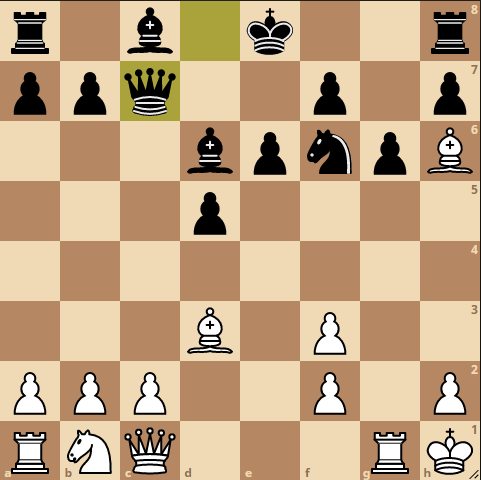

Chess is a great game! It's simple with easy to learn rules, yet requires in-depth knowledge and skill to master. Chess is fundamentally a game of patterns, and there is a lot of information that is created from just a single match. Data science methods can be used to answer all sorts of interesting chess questions. For instance:

- Which opening move has the highest likelihood of producing a win?
- Do higher/lower rated players prefer different openings?
- What impact does time increment have on the outcome of chess matches?

This analysis focuses on a collection of around 20,000 chess matches played on lichess.org. This dataset was published on [kaggle](https://www.kaggle.com/datasets/datasnaek/chess) and created using the [Lichess API](https://github.com/ornicar/lila). The variables used in this analysis are as follows:

- Game ID (id)
- Rated (rated)
- Start Time (created_at)
- End Time (last_move_at)
- Number of Turns (turns)
- Game Status (victory_status)
- Winner (winner)
- Time Increment (increment_code)
- White Player ID (white_id)
- White Player Rating (white_rating)
- Black Player ID (black_id)
- Black Player Rating (black_rating)
- All Moves in Standard Chess Notation (moves)
- Opening Eco (opening_eco)
- Opening Name (opening_name)
- Opening Play (opening_ply)

### Load, clean, and view the data

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from IPython.display import display

%matplotlib inline

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

Following loading in the data, the `head()` method can be used to view the first 5 rows of the dataset.

Everything appears fine visually, though it should be noted that the `opening_ply` column contains a numeric code called an ECO code. ECO codes are a classification system for chess opening moves. [This website](https://www.365chess.com/eco.php) provides a list of each code and corresponding opening.

In [2]:
# load the 'matches' dataset from csv
matches = pd.read_csv('matches.csv')

# observe the rows and columns
rows, cols = matches.shape
print(f"There are {rows} rows and {cols} columns in the matches dataset")

# view the dataset with head()
display(matches.head())

There are 20058 rows and 16 columns in the matches dataset


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


The `describe()` method shows values like percentile, mean and standard deviation for the continuous variables in the dataset.

It looks like the average number of turns per game is about 60, and the average player rating is about 1592 across both the black and white columns. Based on the minimum and maximum values, player rating spans a vast range from beginners to grandmasters.

The `info()` method gives information about the data types of columns as well as whether or not they contain null values.

In [3]:
display(matches.describe().T)
display(matches.info())

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
last_move_at,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


None

### Check for duplicate and missing values

After using the `duplicated()` method, it looks like there are repeated games in this dataset. For this analysis, it's important to deduplicate the data so that games are not captured more than once.

There are 429 duplicate games that will need to be dropped from the `matches` dataframe before moving forward.

In [4]:
print("Number of duplicates in matches:", matches.duplicated().sum())

# id zZK6BQrf appears in the dataset 3 times
print("There are duplicate ids in the dataset. For instance, zZK6BQrf appears 3 times:")
display(matches[matches['id']=='zZK6BQrf'])

# print number of matches before dropping duplicates
rows, cols = matches.shape
print(f"There are {rows} rows and {cols} columns in matches before dropping duplicates")

# drop the 429 duplicates in the dataset
matches = matches.drop_duplicates()

# print number of matches before dropping duplicates
rows, cols = matches.shape
print(f"There are {rows} rows and {cols} columns in matches after dropping duplicates")

Number of duplicates in matches: 429
There are duplicate ids in the dataset. For instance, zZK6BQrf appears 3 times:


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
1588,zZK6BQrf,True,1.503990e+12,1.503990e+12,17,mate,white,10+0,bulletlover,1231,a_p_t_e_m_u_u,1295,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,C57,Italian Game: Two Knights Defense | Fried Liv...,11
13162,zZK6BQrf,True,1.503994e+12,1.503994e+12,17,mate,white,10+0,bulletlover,1231,a_p_t_e_m_u_u,1295,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,C57,Italian Game: Two Knights Defense | Fried Liv...,11
14780,zZK6BQrf,True,1.503994e+12,1.503994e+12,17,mate,white,10+0,bulletlover,1231,a_p_t_e_m_u_u,1295,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 Nxf7 Kx...,C57,Italian Game: Two Knights Defense | Fried Liv...,11


There are 20058 rows and 16 columns in matches before dropping duplicates
There are 19629 rows and 16 columns in matches after dropping duplicates


The `isnull()` method can be used to check for missing values in the dataset. Fortunately, this dataset provided by an API and has no missing data for any columns. How convenient!

In [5]:
# check for missing values in the dataset
print(matches.isnull().sum())

# print the total missing values
print("\nTotal missing values:", matches.isnull().sum().sum())

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Total missing values: 0


### Visualize the data

Chess rating (or Elo) is a metric that is used to estimate the strength of a player. This system spans a wide skill gap, with higher rated players awarded greater ratings than lower skilled players. Viewing the histogram below, the `matches` dataset has games based on practically every skill level. The distribution of player rating appears approximately normally distributed, with the average player rating being about 1600.

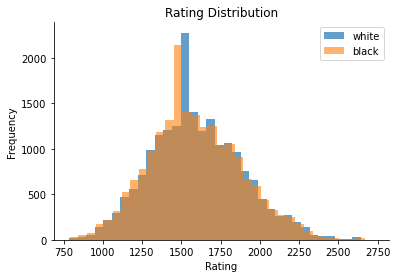

In [6]:
# title and axis labels
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Frequency')

# plot both rating frequency distributions
plt.hist(matches['white_rating'], bins=35, alpha=0.7)
plt.hist(matches['black_rating'], bins=35, alpha=0.6)
plt.legend(['white', 'black'])

# remove right and top lines on chart
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.grid(False)
ax.set_facecolor("white")

plt.show()

There are possible outcomes from a chess match: win, lose, or draw. The bar chart below illustrates the games that resulted in a win for white, a win for black, and a draw. Notice that white wins slightly more than black, which makes sense since white moves first. Draws are relatively uncommon.

Similarly, there are different ways to win/lose a match. The most common is a resignation, where a player voluntarily concedes the game to their opponent (often to avoid an incoming checkmate). Additionally, games can end in mate, flagged, or a draw.

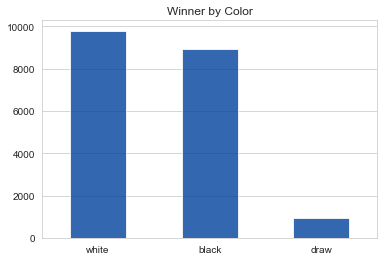

Winner by Color:

white    9792
black    8919
draw      918
Name: winner, dtype: int64


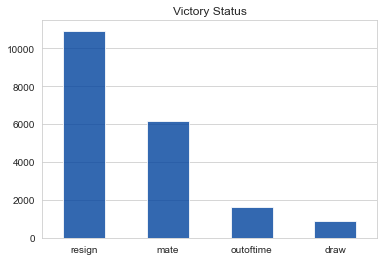

In [7]:
sns.set_style("whitegrid")

# title and axis labels
plt.title("Winner by Color")

# bar chart for white win, black win, or draw
matches.winner.value_counts().plot(kind='bar', rot = 0, alpha=0.8, color='#00429d')
ax = plt.subplot(111)
ax.spines[['top', 'right','left','bottom']].set_visible(True)
#ax.grid(False)
ax.grid(axis='x')
ax.set_facecolor("white")

# display the plot
plt.show()

print("Winner by Color:\n")
print(matches['winner'].value_counts())

# title and axis labels
plt.title("Victory Status")

# bar chart for game outcome: resign, mate, outoftime, draw
matches.victory_status.value_counts().plot(kind='bar', rot = 0, alpha=0.8, color='#00429d')
ax = plt.subplot(111)
ax.spines[['top', 'right','left','bottom']].set_visible(True)
#ax.grid(False)
ax.grid(axis='x')
ax.set_facecolor("white")

# display the plot
plt.show()

### Correlation and heatmap

Inspecting the correlation with the `corr()` method shows that many of the variables are weakly correlated, which is to be expected. However, `white_rating` and `black_rating` are fairly strongly correlated. This is because lichess is designed to organize matches between players of approximately equal skill rating. Checking correlation is good practice when using regression techniques so that variables that exhibit high degrees of collinearity can be appropriately handled.

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,0.005391,0.005386,0.089975,0.002580,0.030516,-0.002469
created_at,0.005391,1.000000,1.000000,0.088857,0.124305,0.141454,0.101587
last_move_at,0.005386,1.000000,1.000000,0.088868,0.124307,0.141456,0.101589
turns,0.089975,0.088857,0.088868,1.000000,0.129071,0.159820,0.055499
white_rating,0.002580,0.124305,0.124307,0.129071,1.000000,0.632539,0.278365
black_rating,0.030516,0.141454,0.141456,0.159820,0.632539,1.000000,0.255491
opening_ply,-0.002469,0.101587,0.101589,0.055499,0.278365,0.255491,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

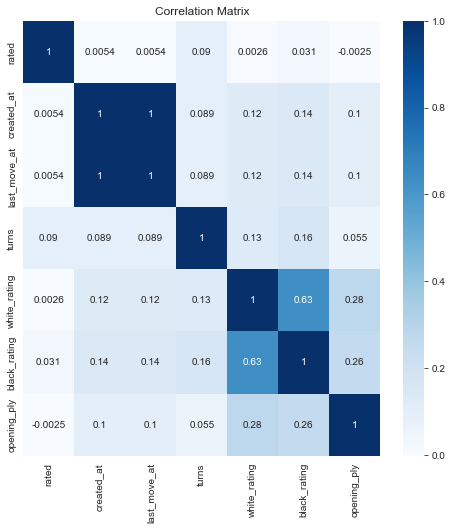

In [8]:
display(matches.corr())

# plot seaborn heatmap
plt.figure(figsize=(8,8))
sns.heatmap(matches.corr(), annot=True, cmap='Blues').set_title('Correlation Matrix') #cmap='viridis'

### Pairplot

The pairplot from seaborn shows the relationship between all of the continuous variables in the dataset. The scatterplots are pretty uninteresting, but the histograms show the distribution of each variable. Notice that `turns` is right skewed, suggesting that shorter games are more common than longer ones.

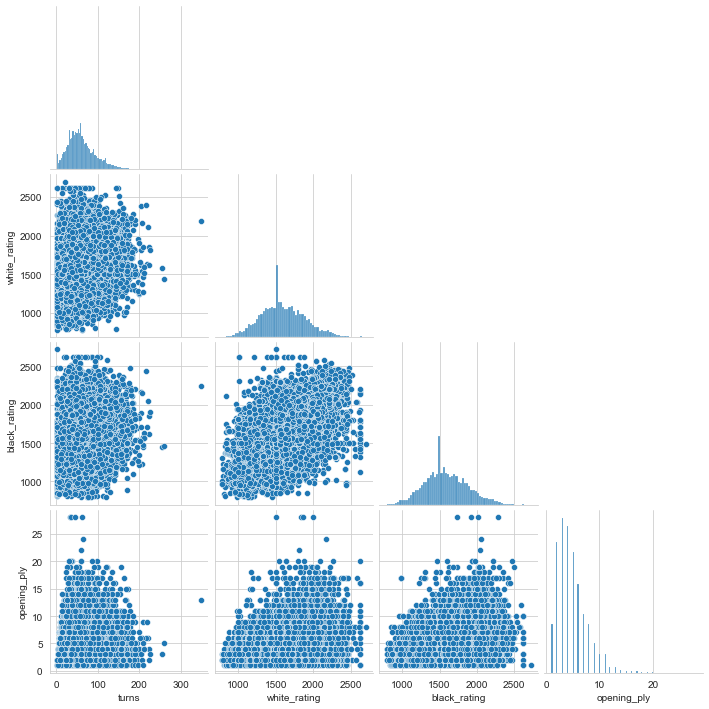

In [9]:
# pairplot will not accept boolean values
# created_at and last_move_at don't give useful results, practically perfectly correlated
df = matches.drop(columns=['rated','created_at','last_move_at'])

sns.pairplot(df, corner=True)

<br>To conclude, exploratory data analysis is a nice way to organize, clean, and view the data before moving on to more complicated modeling techniques. It will be interesting to see what machine learning approaches can be applied to chess data.